## Module 9 Project 2 : Clustering and SVM
### Aishwarya, Dengyi, Xin and Yuchen

### Introduction:

In this assignment we are required to used clustering and SVM methods to create groupings of similar data observations with the provided data set.

This data set called the online shopper puchaseing intention data set which has 12330 rows and 84.5% of dataset were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping. 

__Goals__:

1.use k-means and SVM to generate models.

2.If we can use the appropraite model to grouping different buyers, we can find the features of those buyers and improving the online service.

__Data Description:__

"Administrative Page", "Informational Page" and "Product Rlated" Page and the visit duration between on these pages.  

"Bounce Rate" can be used to find those unattractive site, because user didn't triger anything in this page. 

"Page Value" can be used to evaluate the if the using process is too long. 

"Special Day" can be used to find the reasons of high visits.



__Data Shape__:

(12330, 18)

__Target Column Type__: 
Binary Category


__Categorical(nominal)__ :

SpecialDay, Month	OperatingSystems, Browser, Region, TrafficType,VisitorType, Weekend

__Numerical data(discret)__:

Administrative, Informational, ProductRelated, Administrative_Duration, Informational_Duration, ProductRelated_Duration, BounceRates, ExitRates, PageValues

__Training Model Name__:

K-means and SVM

__Evaluation Methods__:

Confusion Matrix

__Problems__:

Tidy data or not:not

Unknown Symbol:no

Missing Value:no

Duplicated Value: It doesn't matter

In [1]:
#Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
import seaborn as sns
from seaborn import heatmap
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
#read the dataset
path = "https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-6150/main/Project2_Data.csv"
df = pd.read_csv(path)

In [3]:
#read the label dataset
path2 = "https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-6150/main/Project2_Data_Labels.csv"
dflabel = pd.read_csv(path2)

In [4]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.000000,0,0.00,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.000000,0,0.00,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.500000,2,82.00,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.700000,0,0.00,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.000000,1,15.00,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
5,4,44.000000,0,0.00,90,6951.972222,0.002151,0.015013,0.000000,0.0,Feb,4,1,1,3,Returning_Visitor,False
6,9,294.658788,2,97.64,107,3173.210417,0.003139,0.009122,5.866249,0.0,June,1,1,1,2,Returning_Visitor,False
7,1,0.000000,0,0.00,20,2270.833333,0.000000,0.023810,10.231873,0.0,Mar,2,2,3,6,Returning_Visitor,False
8,3,13.000000,0,0.00,7,79.500000,0.000000,0.020000,0.000000,0.0,Mar,2,2,1,8,New_Visitor,True
9,7,374.369048,0,0.00,5,258.083333,0.004545,0.052525,0.000000,0.0,May,3,2,3,1,Returning_Visitor,False


In [5]:
dflabel.head()

,Revenue
0,True
1,False
2,False
3,False
4,False


In [6]:
#shape of the data
df.shape

(12330, 17)

In [7]:
#check sum of the null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [8]:
#check the datatypes of the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
#describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [10]:
#check if any duplicated rows
df.duplicated().sum()

125

This dataset has 125 duplicates but it is not recommended to delete or drop them. First reason is there no Target variable in this dataset and the labels might be different and the label may be differentiating factor in this. Second reason is that even if we drop duplicates, there would be mismatch when we add the Target column to this dataset

In [11]:
#Get columns with numeric datatype to plot
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

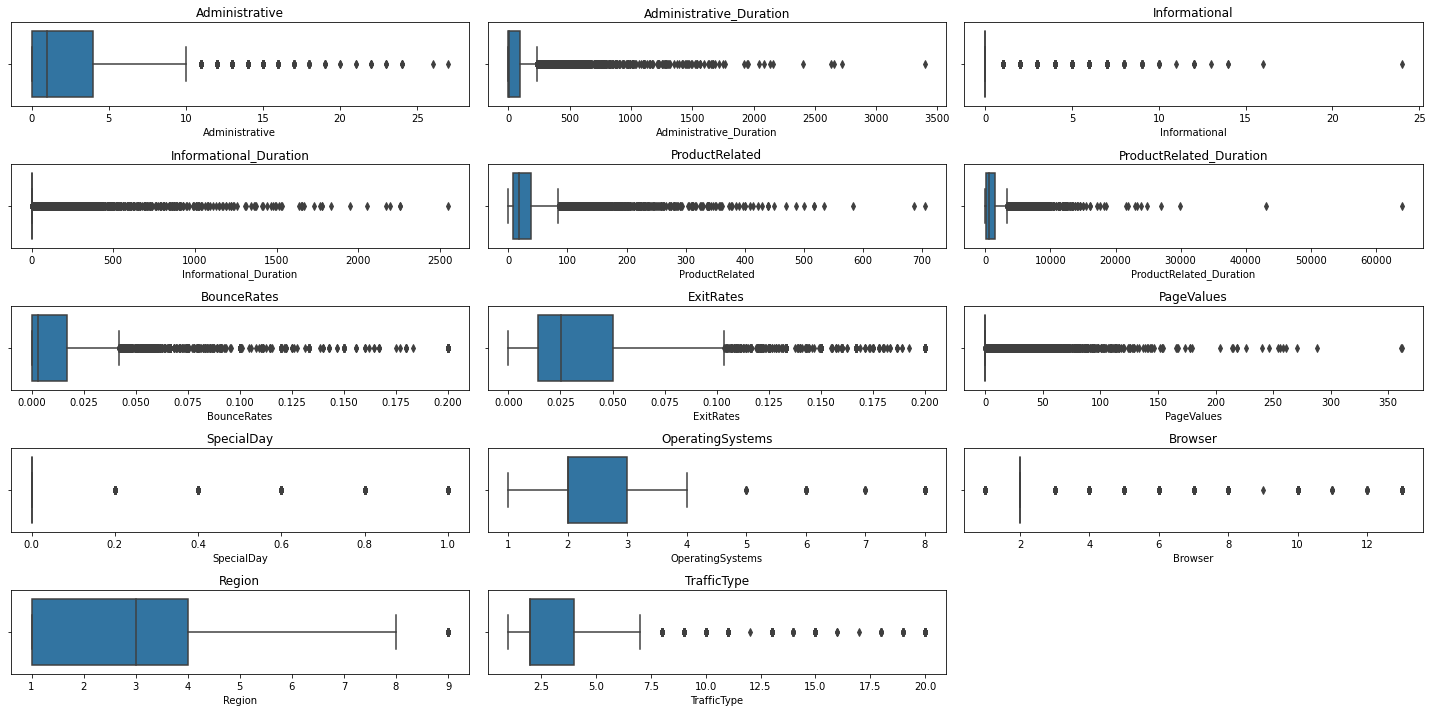

In [12]:
plt.figure(figsize=(20,10))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.title(col)

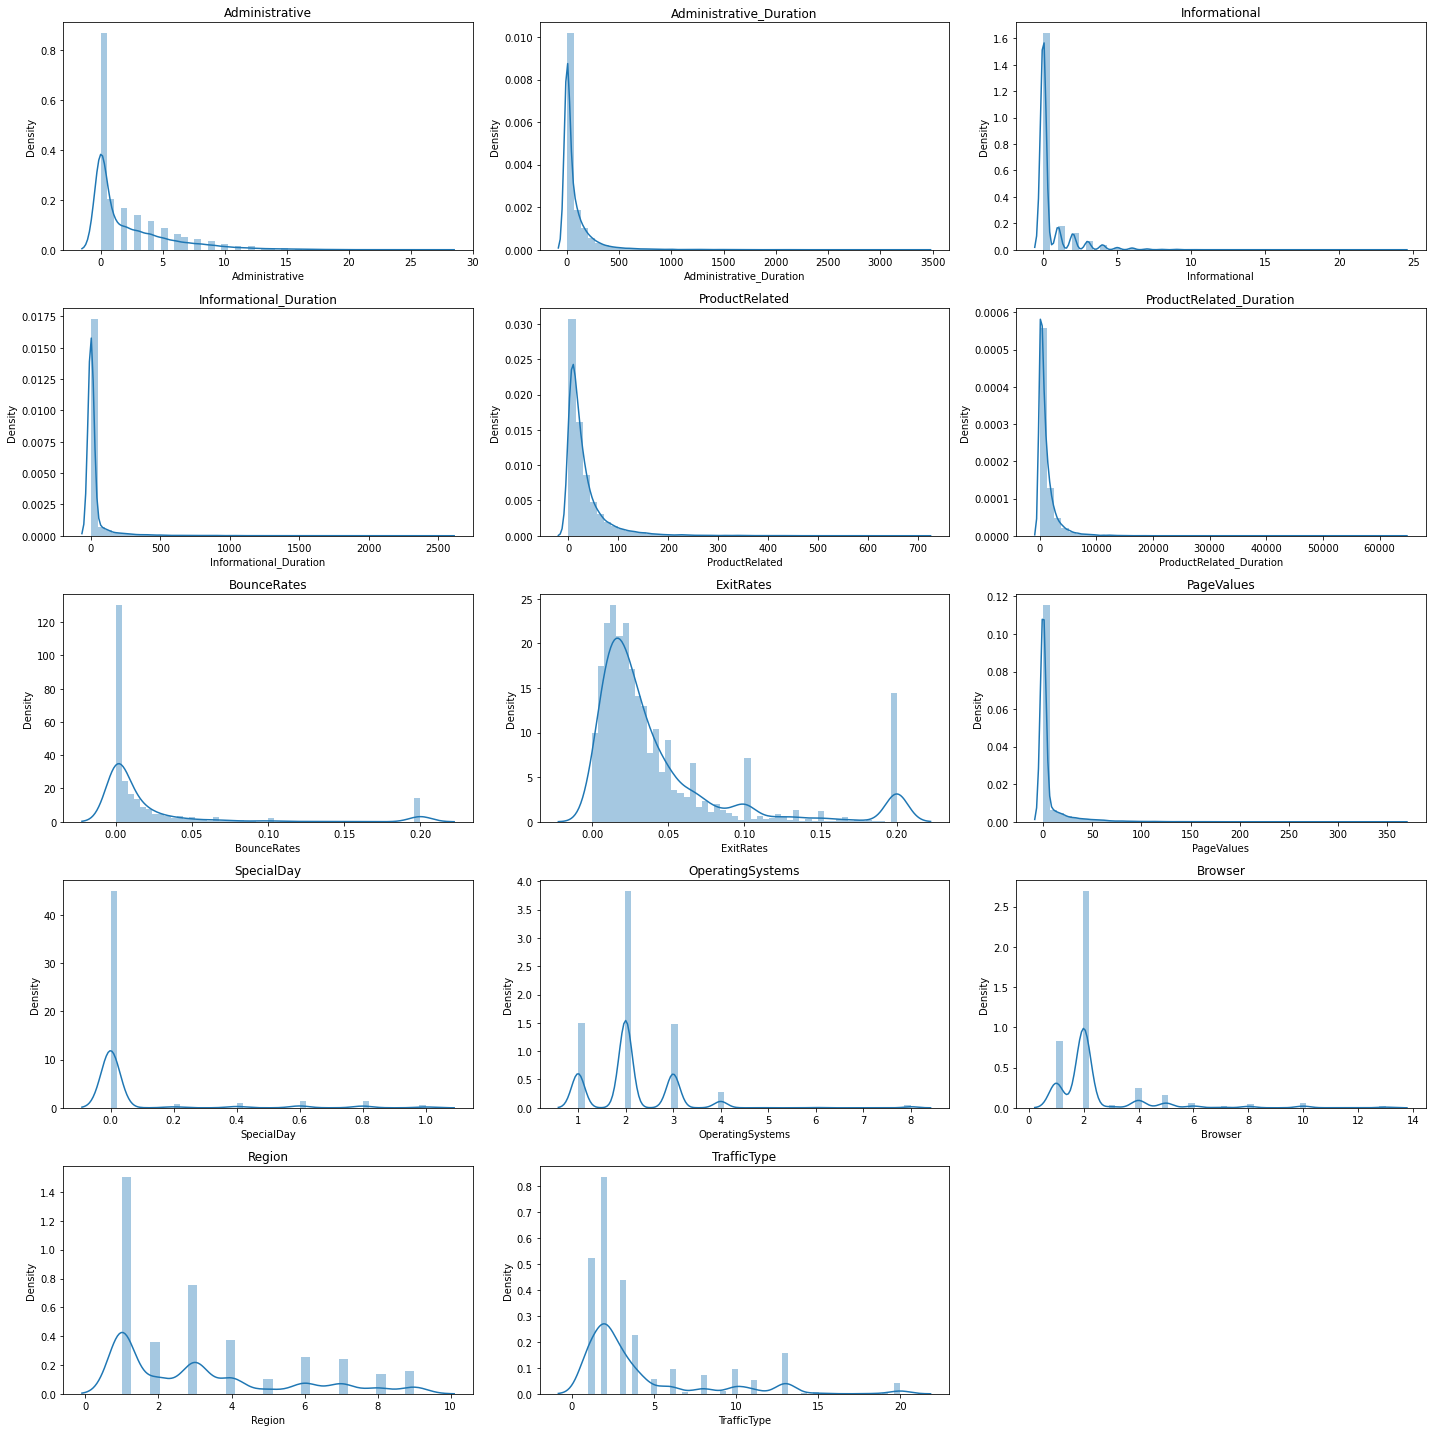

In [13]:
#This functions plots the estimated probability density function of the data

plt.figure(figsize=(20,20))
for i,col in enumerate(numeric_cols):
    plt.subplot(math.ceil(len(numeric_cols)/3),3,i+1)
    sns.distplot(df[col],label=col,kde=True)
    plt.tight_layout()
    plt.title(col)

In [14]:
#Check unique values of the remaining variables
df['VisitorType'].unique()

array(['New_Visitor', 'Returning_Visitor', 'Other'], dtype=object)

In [15]:
df['Month'].unique()

array(['May', 'Mar', 'Nov', 'Feb', 'June', 'Sep', 'Dec', 'Jul', 'Aug',
       'Oct'], dtype=object)

In [16]:
df['Weekend'].unique()

array([ True, False])

- __Numerical variables(10)__: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay
- __Categorical variables(7)__: OperatingSystems, Browser, Region, TrafficType, VisitorType, Month, Weekend

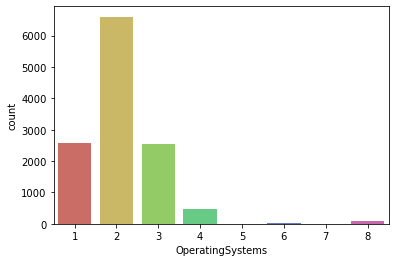

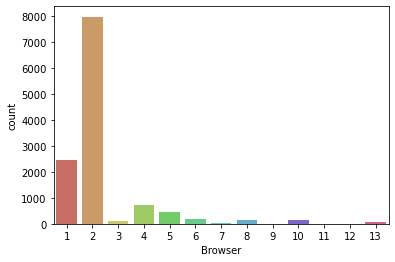

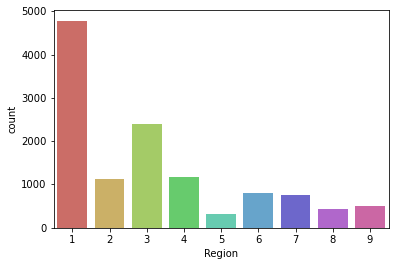

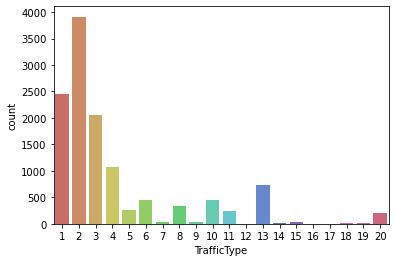

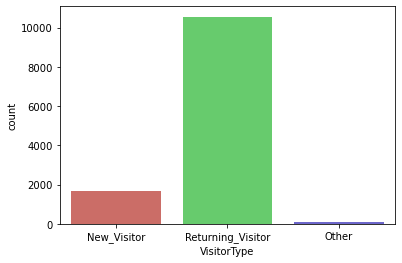

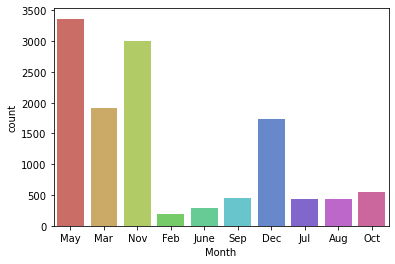

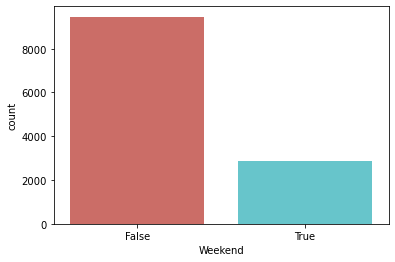

In [17]:
cat_v = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month', 'Weekend']
for i in cat_v:
    sns.countplot(x=i,data = df, palette='hls')
    plt.show()

In [18]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767


<AxesSubplot:>

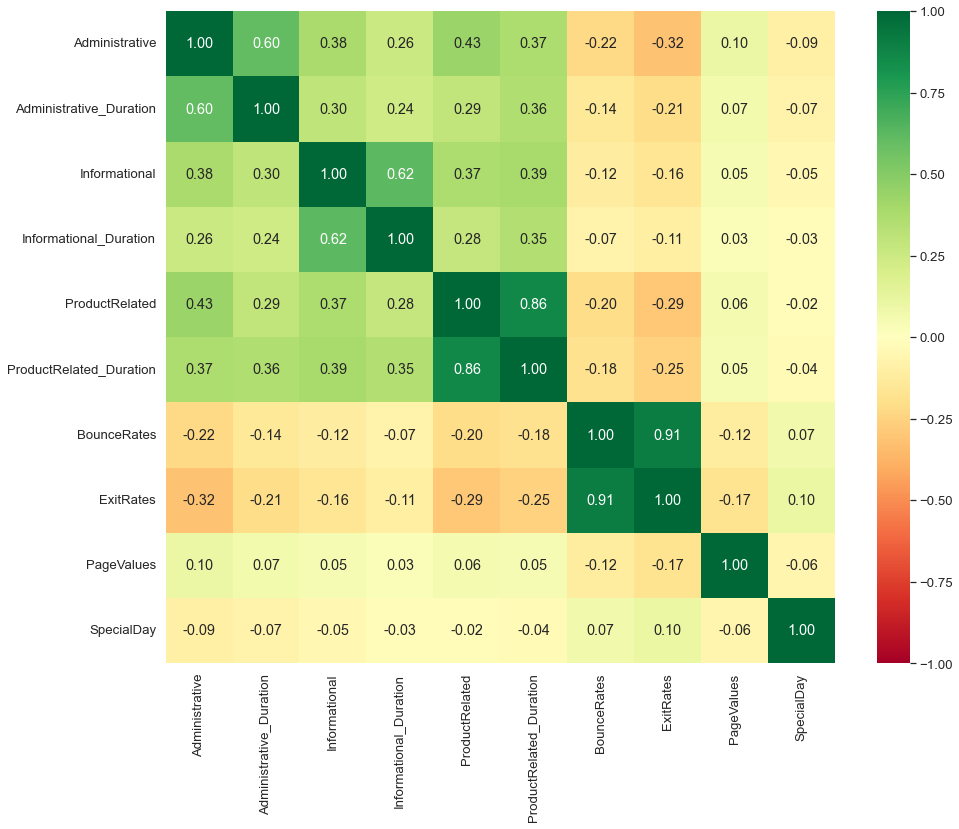

In [19]:
#Plot heatmap only for the numeric variables
plt.figure(figsize=(15,12))
sns.set(font_scale=1.2)
sns.heatmap(df.iloc[:,:10].corr(),cmap='RdYlGn',vmin = -1, vmax = 1,annot=True,fmt=".2f")

In [20]:
#Replace the month names with numbers 
df['Month']=df['Month'].replace(['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],
                                  [1,2,3,4,5,6,7,8,9,10,11,12])

In [21]:
#change the datatype of weekend from boolean to integer
df['Weekend']=df['Weekend'].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [23]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,New_Visitor,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,Returning_Visitor,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,New_Visitor,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,Returning_Visitor,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,Returning_Visitor,0


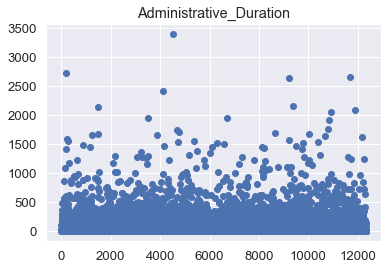

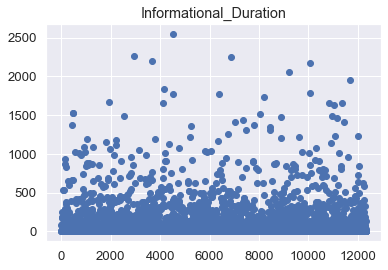

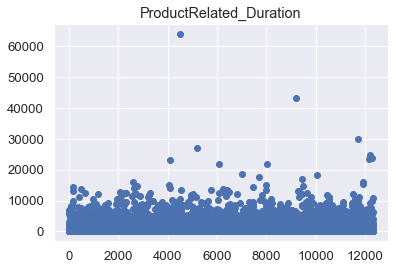

In [24]:
#scatter plot the duration variables to spot the outliers
duration_v = 'Administrative_Duration','Informational_Duration','ProductRelated_Duration'
for j in duration_v:
    plt.scatter(df.index,df[j])
    plt.title(j)
    plt.show()

### Data Preparation:

In [25]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,5,1,1,1,2,New_Visitor,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,3,2,2,4,2,Returning_Visitor,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,11,2,2,9,2,New_Visitor,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,11,1,1,2,3,Returning_Visitor,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,5,2,2,3,4,Returning_Visitor,0


In [26]:
#drop the columns
df1 = df.drop(columns=['ProductRelated','ExitRates','TrafficType','OperatingSystems'],axis=1)

- ProductRelated is highly correlated to ProductRelated_Duration
- ExitRates is highly correlated to BounceRates
- TrafficType and OperatingSystems is not defined properly. Also, predicting the purchases with OperatingSystems cannot be defined 

In [27]:
#Create dummy variable for Visitor type
dummies_1 = pd.get_dummies(df1['VisitorType']).rename(columns = lambda x: 'VisitorType_'+str(x))
df1 = pd.concat([df1,dummies_1],axis = 1)
df1 = df1.drop(['VisitorType'],axis = 1)

In [28]:
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,Browser,Region,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.00,0,0.0,222.000000,0.000000,53.474571,0.0,5,1,1,1,1,0,0
1,0,0.00,0,0.0,1037.500000,0.014286,0.000000,0.0,3,2,4,0,0,0,1
2,4,37.50,2,82.0,96.625000,0.000000,0.000000,0.0,11,2,9,0,1,0,0
3,4,115.70,0,0.0,655.383333,0.000000,0.000000,0.0,11,1,2,0,0,0,1
4,1,60.00,1,15.0,670.166667,0.000000,0.000000,0.0,5,2,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,148.00,0,0.0,292.500000,0.000000,0.000000,0.0,3,2,1,1,0,0,1
12326,1,9.00,1,29.5,1157.583333,0.007692,0.000000,0.0,11,2,7,0,0,0,1
12327,0,0.00,0,0.0,4157.633333,0.010000,0.000000,0.0,7,2,1,0,0,0,1
12328,0,0.00,0,0.0,1417.666667,0.016117,0.000000,1.0,5,6,3,1,0,0,1


In [29]:
df1.iloc[:,:8].columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay'],
      dtype='object')

In [30]:
#Standardize the numeric variables
scale = StandardScaler()
df2 = scale.fit_transform(df1.iloc[:,:8])
df2 = pd.DataFrame(df2,columns = df1.iloc[:,:8].columns)

In [31]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.508335,-0.457683,2.562803,-0.308821
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.082173,-0.163049,-0.317178,-0.308821
2,0.507228,-0.245054,1.178195,0.337689,-0.573853,-0.457683,-0.317178,-0.308821
3,0.507228,0.197324,-0.396478,-0.244931,-0.281859,-0.457683,-0.317178,-0.308821
4,-0.395938,-0.117771,0.390859,-0.138354,-0.274133,-0.457683,-0.317178,-0.308821


In [32]:
#Add the remaining columns to the dataframe
for k in df1.iloc[:,8:].columns:
    df2[k]=df1[k]

In [33]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,Browser,Region,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.508335,-0.457683,2.562803,-0.308821,5,1,1,1,1,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.082173,-0.163049,-0.317178,-0.308821,3,2,4,0,0,0,1
2,0.507228,-0.245054,1.178195,0.337689,-0.573853,-0.457683,-0.317178,-0.308821,11,2,9,0,1,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.281859,-0.457683,-0.317178,-0.308821,11,1,2,0,0,0,1
4,-0.395938,-0.117771,0.390859,-0.138354,-0.274133,-0.457683,-0.317178,-0.308821,5,2,3,0,0,0,1


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated_Duration        12330 non-null  float64
 5   BounceRates                    12330 non-null  float64
 6   PageValues                     12330 non-null  float64
 7   SpecialDay                     12330 non-null  float64
 8   Month                          12330 non-null  int64  
 9   Browser                        12330 non-null  int64  
 10  Region                         12330 non-null  int64  
 11  Weekend                        12330 non-null  int64  
 12  VisitorType_New_Visitor        12330 non-null 

In [35]:
#load the libraries
from sklearn.experimental import (
    enable_iterative_imputer)
from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree)
from sklearn.ensemble import (
    RandomForestClassifier)
from sklearn.cluster import KMeans

In [36]:
#Fit the model to KMeans with 2 clusters
km = KMeans(2, random_state=42)
km.fit(df2)

KMeans(n_clusters=2, random_state=42)

In [37]:
#Show the predictions
X_km = km.predict(df2)
X_km

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

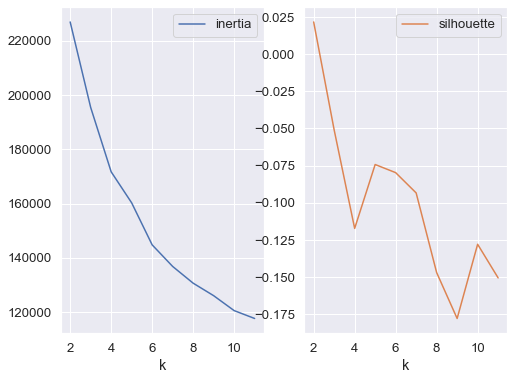

In [38]:
#Plot the inertia and silhouette graphs to get the number of clusters
from sklearn import metrics
inertias = []
sils = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df2)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(df1, k2.labels_)
    )

fig, ax = plt.subplots(figsize=(8, 6))
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(1,2))
);

- Inertia shows 4 clusters at the created elbow
- Silhoutte shows 2 clusters at the peak of k=2

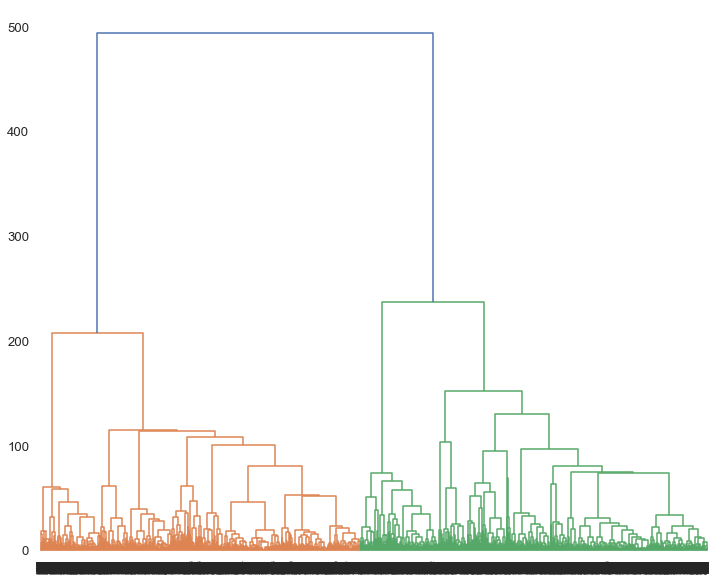

In [39]:
#Plot the dendogram
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(12, 10))
dend = hierarchy.dendrogram(
    hierarchy.linkage(df2, method="ward")
)

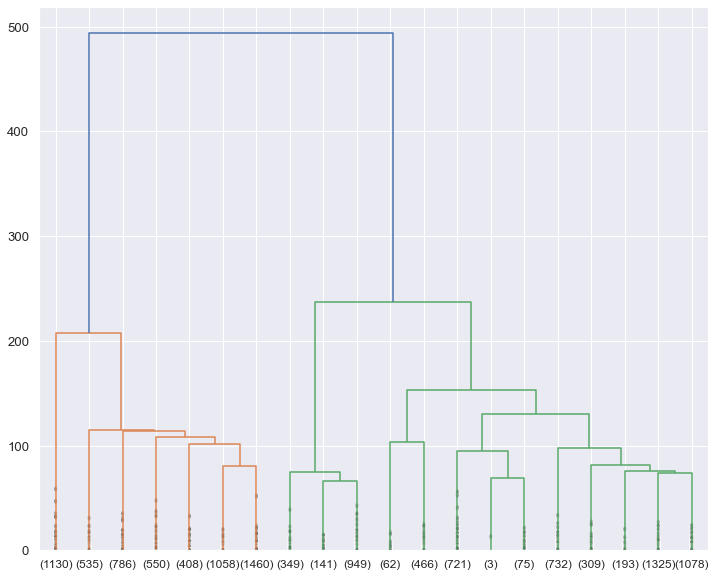

In [40]:
#Plot the truncated dendogram
fig, ax = plt.subplots(figsize=(12, 10))
dend = hierarchy.dendrogram(
    hierarchy.linkage(df2, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)

Reference : https://github.com/mattharrison/ml_pocket_reference/blob/master/ch18.ipynb

Try imagining a horizontal line around 300 and it does not overlap with any other horizontal line. Doing this we get 2 clusters from the dendogram

#### From our clustering EDA, we can notice that we should use let k_cluster = 2, after that we could get our prediction of our revenue and add to dataframe and compare it with the label dataframe.

In [41]:
from sklearn.cluster import (
    AgglomerativeClustering,
)
ag = AgglomerativeClustering(
    n_clusters=2,
    affinity="euclidean",
    linkage="ward",
)
ag.fit(df1)

AgglomerativeClustering()

In [42]:
km = KMeans(random_state=42, n_clusters=2)
km.fit(df2)
inertias.append(km.inertia_)
sils.append(
    metrics.silhouette_score(df1, k2.labels_)
)

In [43]:
y_pred = km.fit_predict(df2)

In [44]:
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [45]:
df2['V_Revenue'] = y_pred

In [46]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,Browser,Region,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,V_Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.508335,-0.457683,2.562803,-0.308821,5,1,1,1,1,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.082173,-0.163049,-0.317178,-0.308821,3,2,4,0,0,0,1,1
2,0.507228,-0.245054,1.178195,0.337689,-0.573853,-0.457683,-0.317178,-0.308821,11,2,9,0,1,0,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.281859,-0.457683,-0.317178,-0.308821,11,1,2,0,0,0,1,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.274133,-0.457683,-0.317178,-0.308821,5,2,3,0,0,0,1,1


In [47]:
df2['Revenue'] = dflabel['Revenue']
df2['Revenue']=df2['Revenue'].astype('int')
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,Browser,Region,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,V_Revenue,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.508335,-0.457683,2.562803,-0.308821,5,1,1,1,1,0,0,1,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.082173,-0.163049,-0.317178,-0.308821,3,2,4,0,0,0,1,1,0
2,0.507228,-0.245054,1.178195,0.337689,-0.573853,-0.457683,-0.317178,-0.308821,11,2,9,0,1,0,0,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.281859,-0.457683,-0.317178,-0.308821,11,1,2,0,0,0,1,0,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.274133,-0.457683,-0.317178,-0.308821,5,2,3,0,0,0,1,1,0


# Now we can use some algorithm to compare with these two columns.

In [48]:
percent_equal = (df2['V_Revenue'] == df2['Revenue']).mean() 
percent_equal

0.45085158150851584

In [49]:
y_actual = df2['Revenue']
y_predict = df2['V_Revenue']
confusion_matrix = pd.crosstab(pd.Series(y_actual, name='Actual'), pd.Series(y_predict, name='Predicted'))
print(confusion_matrix)

Predicted     0     1
Actual               
0          4904  5518
1          1253   655


# Plot the confusion matrix

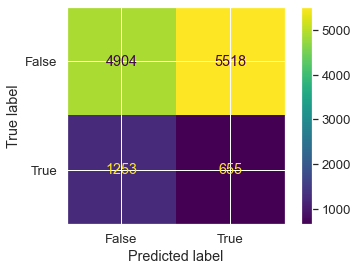

In [50]:
confusion_matrix = metrics.confusion_matrix(y_actual, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Also we can define a function to calculate the accuracy

# Accuracy Function

In [51]:
def calc_accu(actual, predicted):
    if len(actual) != len(predicted):
        print('lens error')
        return None

    correct = 0
    Sum = len(actual)

    for i in range(Sum):
        if actual[i] == predicted[i]:
            correct += 1

    accuracy = correct / Sum
    return accuracy

In [52]:
calc_accu(df2['Revenue'], df2['V_Revenue'])

0.45085158150851584

# Precision Function

In [53]:
def precision_function(actual,predict):
    if len(actual) != len(predict):
        print('length error') 
    
    true_positives = 0
    false_positives = 0
    for i in range(len(actual)):
        if actual[i] == 1 and predict[i] == 1:
            true_positives += 1
        elif actual[i] == 0 and predict[i] == 1:
            false_positives += 1
    precision = true_positives / (true_positives + false_positives)
    return precision

In [54]:
precision_function(df2['Revenue'], df2['V_Revenue'])

0.1061072412117285

# Recall Function

In [55]:
def recall_function(actual,predict):
    if len(actual) != len(predict):
        print('length error') 
    
    true_positives = 0
    false_negatives = 0
    for i in range(len(actual)):
        if actual[i] == 1 and predict[i] == 1:
            true_positives += 1
        elif actual[i] == 1 and predict[i] == 0:
            false_negatives += 1
    recall = true_positives / (true_positives + false_negatives)
    return recall

In [56]:
recall_function(df2['Revenue'], df2['V_Revenue'])

0.34329140461215935

# Specificity Function

In [57]:
def specificity_function(actual,predict):
    if len(actual) != len(predict):
        print('length error') 
    
    true_negatives = 0
    false_positives = 0
    for i in range(len(actual)):
        if actual[i] == 0 and predict[i] == 0:
            true_negatives += 1
        elif actual[i] == 0 and predict[i] == 1:
            false_positives += 1
    specificity = true_negatives / (true_negatives + false_positives)
    return specificity

In [58]:
specificity_function(df2['Revenue'], df2['V_Revenue'])

0.4705430819420457

# F1 Score Function

In [59]:
def f1_score(actual,predict):
    if len(actual) != len(predict):
        print('length error') 
    
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    for i in range(len(actual)):
        if actual[i] == 1 and predict[i] == 1:
            true_positives += 1
        elif actual[i] == 0 and predict[i] == 1:
            false_positives += 1
        elif actual[i] == 1 and predict[i] == 0:
            false_negatives += 1
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

In [60]:
f1_score(df2['Revenue'], df2['V_Revenue'])

0.16210864991956442

# Re-do our K-Means model using data with dummy varaibles.

In [61]:
df3 = df2.copy()
df3 = df3.drop(['V_Revenue', 'Revenue'], axis=1)
df3.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,Browser,Region,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.508335,-0.457683,2.562803,-0.308821,5,1,1,1,1,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.082173,-0.163049,-0.317178,-0.308821,3,2,4,0,0,0,1
2,0.507228,-0.245054,1.178195,0.337689,-0.573853,-0.457683,-0.317178,-0.308821,11,2,9,0,1,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.281859,-0.457683,-0.317178,-0.308821,11,1,2,0,0,0,1
4,-0.395938,-0.117771,0.390859,-0.138354,-0.274133,-0.457683,-0.317178,-0.308821,5,2,3,0,0,0,1


In [62]:
df3 = pd.get_dummies(df3, columns=["Month","Browser","Region"])
df3.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Weekend,VisitorType_New_Visitor,...,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.508335,-0.457683,2.562803,-0.308821,1,1,...,0,1,0,0,0,0,0,0,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.082173,-0.163049,-0.317178,-0.308821,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.507228,-0.245054,1.178195,0.337689,-0.573853,-0.457683,-0.317178,-0.308821,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.507228,0.197324,-0.396478,-0.244931,-0.281859,-0.457683,-0.317178,-0.308821,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.274133,-0.457683,-0.317178,-0.308821,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
km = KMeans(random_state=42, n_clusters=2)
km.fit(df3)

KMeans(n_clusters=2, random_state=42)

In [64]:
y_pred = km.fit_predict(df3)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [65]:
df3['V_Revenue'] = y_pred
df3['Revenue'] = dflabel['Revenue']
df3['Revenue']=df3['Revenue'].astype('int')
df3.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Weekend,VisitorType_New_Visitor,...,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,V_Revenue,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.508335,-0.457683,2.562803,-0.308821,1,1,...,0,0,0,0,0,0,0,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.082173,-0.163049,-0.317178,-0.308821,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.507228,-0.245054,1.178195,0.337689,-0.573853,-0.457683,-0.317178,-0.308821,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.281859,-0.457683,-0.317178,-0.308821,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.274133,-0.457683,-0.317178,-0.308821,0,0,...,0,1,0,0,0,0,0,0,0,0


In [66]:
y_actual = df3['Revenue']
y_predict = df3['V_Revenue']
confusion_matrix = pd.crosstab(pd.Series(y_actual, name='Actual'), pd.Series(y_predict, name='Predicted'))
print(confusion_matrix)

Predicted     0     1
Actual               
0          9159  1263
1          1428   480


# Accuracy Compare

In [67]:
calc_accu(df2['Revenue'], df2['V_Revenue'])

0.45085158150851584

In [68]:
calc_accu(df3['Revenue'], df3['V_Revenue'])

0.7817518248175183

In [69]:
len(df3.loc[df3['Revenue']==0])/len(df3)

0.8452554744525548

# Precision Compare

In [70]:
precision_function(df2['Revenue'], df2['V_Revenue'])

0.1061072412117285

In [71]:
precision_function(df3['Revenue'], df3['V_Revenue'])

0.27538726333907054

# Recall Compare

In [72]:
recall_function(df2['Revenue'], df2['V_Revenue'])

0.34329140461215935

In [73]:
recall_function(df3['Revenue'], df3['V_Revenue'])

0.25157232704402516

# Specificity Compare

In [74]:
specificity_function(df2['Revenue'], df2['V_Revenue'])

0.4705430819420457

In [75]:
specificity_function(df3['Revenue'], df3['V_Revenue'])

0.8788140472078296

# F1-Score Compare

In [76]:
f1_score(df2['Revenue'], df2['V_Revenue'])

0.16210864991956442

In [77]:
f1_score(df3['Revenue'], df3['V_Revenue'])

0.26294165981922757

# A Real K-Means implementation

In [78]:
pip install yellowbrick

     |████████████████████████████████| 282 kB 3.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [79]:
from sklearn.preprocessing import StandardScaler


from scipy.spatial.distance import cdist, pdist


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import warnings

warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

## K-means Clustering

* In this case, we will exclude the categorical column in df. 

In [80]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [81]:
df_num = df[['Administrative', 'Informational', 'ProductRelated','Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]

Number of Clusters: 1 	Average Distortion: 1131.4345363801885
Number of Clusters: 2 	Average Distortion: 789.79805145541
Number of Clusters: 3 	Average Distortion: 606.7517627331176
Number of Clusters: 4 	Average Distortion: 556.4847297594664
Number of Clusters: 5 	Average Distortion: 434.7447450858031
Number of Clusters: 6 	Average Distortion: 395.62065761244105
Number of Clusters: 7 	Average Distortion: 365.5257866465732
Number of Clusters: 8 	Average Distortion: 323.27679718415726
Number of Clusters: 9 	Average Distortion: 290.1882206291848


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

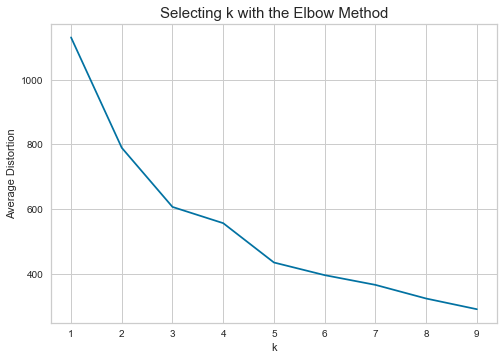

In [82]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_num)
    prediction = model.predict(df_num)
    distortion = (
        sum(np.min(cdist(df_num, model.cluster_centers_, "euclidean"), axis=1))
        / df3.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=15)

* From the above chart, 3 and 5 might be the appropriate cluster number.

### Let's check the silhouette scores

For n_clusters = 2, silhouette score is 0.30829383675440253
For n_clusters = 3, silhouette score is 0.1513697939978019
For n_clusters = 4, silhouette score is 0.12637928460532785
For n_clusters = 5, silhouette score is 0.06536432535808614
For n_clusters = 6, silhouette score is 0.052166359099277845
For n_clusters = 7, silhouette score is 0.041845576520957946
For n_clusters = 8, silhouette score is 0.026538304324689264
For n_clusters = 9, silhouette score is 0.0166328876987659


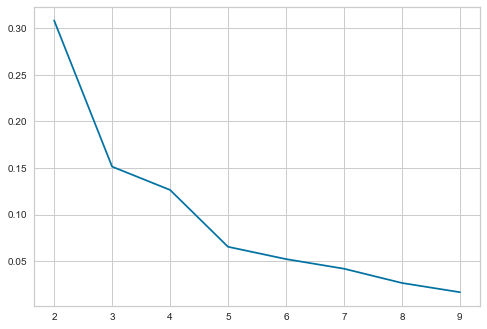

In [83]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df_num))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df3, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

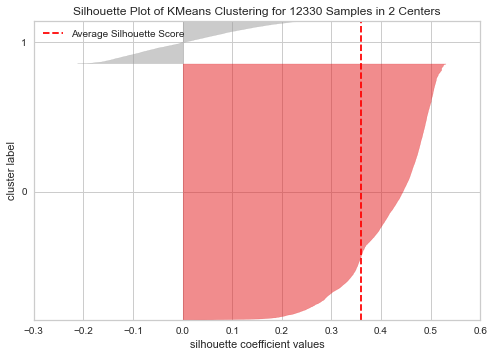

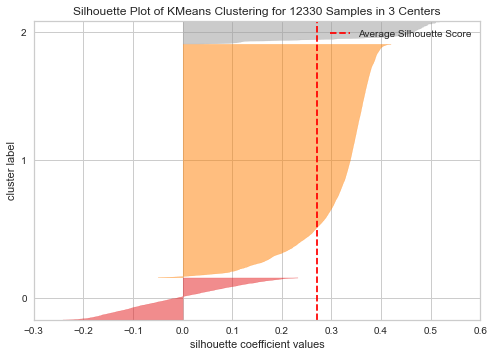

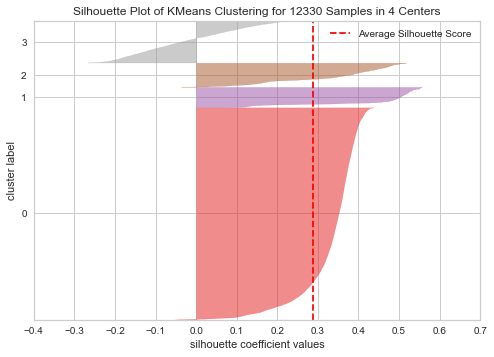

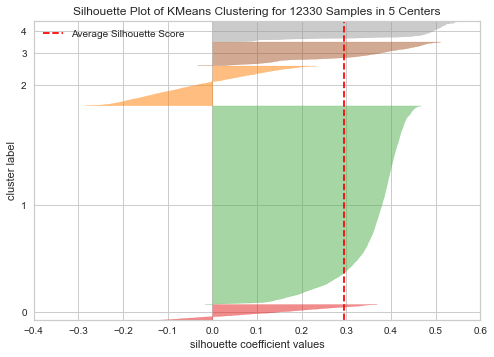

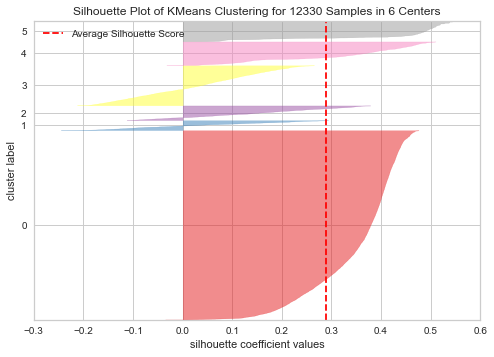

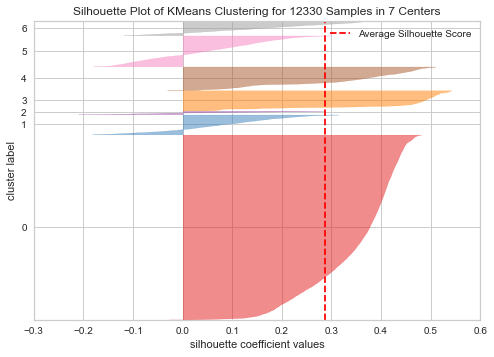

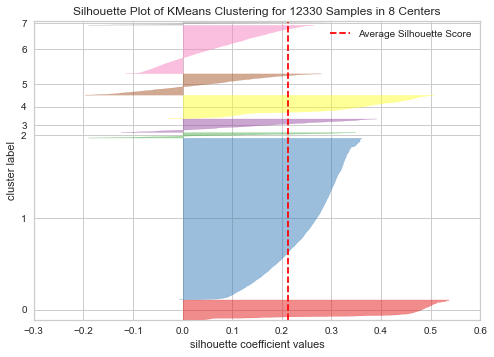

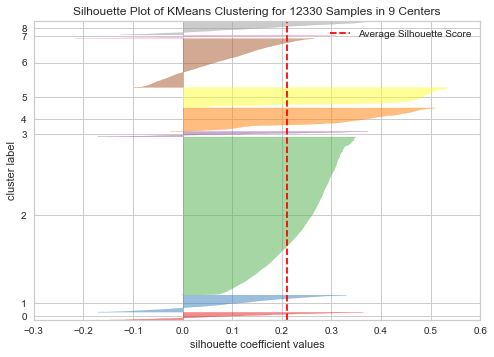

In [84]:
# finding optimal no. of clusters with silhouette coefficients
for i in range(2,10):
    visualizer = SilhouetteVisualizer(KMeans(i))
    visualizer.fit(df3)
    visualizer.show()

### Selecting final model

**Let's take 2 as the appropriate no. of clusters.**

In [85]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_num)

KMeans(n_clusters=2)

In [86]:
df_num["new_Revenue"] = kmeans.labels_

## Cluster Profiling

In [87]:
cluster_profile = df_num.groupby("new_Revenue").mean()

In [88]:
cluster_profile["count_in_each_segment"] = (
    df_num.groupby("new_Revenue")["Administrative_Duration"].count().values
)

In [89]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Administrative,Informational,ProductRelated,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,count_in_each_segment
new_Revenue,,,,,,,,,,
0,2.044222,0.401070,23.238659,70.429125,25.316980,793.739777,0.023474,0.044899,5.770025,11397
1,5.624866,1.755627,135.474812,207.730683,146.309803,6093.213995,0.006524,0.020770,7.345740,933


<AxesSubplot:xlabel='new_Revenue'>

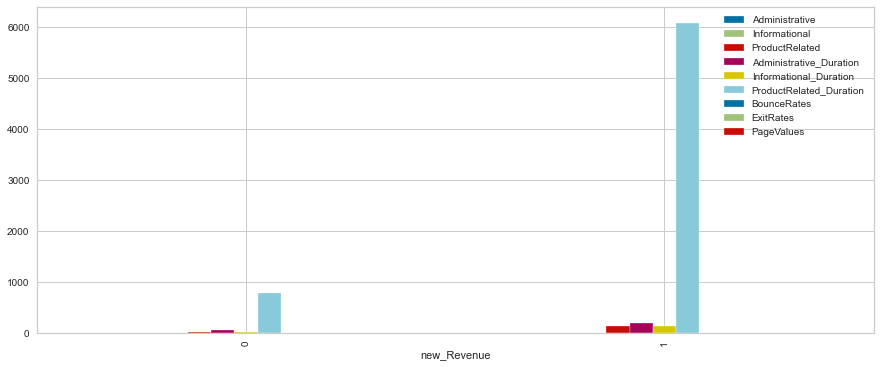

In [90]:
df_num.groupby("new_Revenue").mean().plot.bar(figsize=(15, 6))

## We can noticed that after we use dummy variables the prediction performance become much better in accuracy, specificity, f1 score and precision. But get worse in recall performance.

In [91]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
def model_performance_classification_statsmodels(
     model, x_valid, y_valid
):

    acc = accuracy_score(y_valid, model.predict(x_valid))  # to compute Accuracy
    recall = recall_score(y_valid, model.predict(x_valid))  # to compute Recall
    precision = precision_score(y_valid, model.predict(x_valid))  # to compute Precision
    f1 = f1_score(y_valid, model.predict(x_valid))  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

# Using feature importance in Random Forest. And we would use data using dummy varialbe and do not using dummy variable.

In [92]:
#first using data do not have dummy variable
df4 = df2.copy()
df4.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,Browser,Region,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,V_Revenue,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.508335,-0.457683,2.562803,-0.308821,5,1,1,1,1,0,0,1,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.082173,-0.163049,-0.317178,-0.308821,3,2,4,0,0,0,1,1,0
2,0.507228,-0.245054,1.178195,0.337689,-0.573853,-0.457683,-0.317178,-0.308821,11,2,9,0,1,0,0,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.281859,-0.457683,-0.317178,-0.308821,11,1,2,0,0,0,1,0,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.274133,-0.457683,-0.317178,-0.308821,5,2,3,0,0,0,1,1,0


In [93]:
X = df4.drop(['V_Revenue', 'Revenue'], axis=1)

y = df4['Revenue']

seed = 42

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=seed)

In [94]:
rf1 = RandomForestClassifier(100, min_samples_leaf=5)
rf1.fit(x_train, y_train.values.ravel()) #avoid the warning message
accu = 1 - mean_absolute_error(y_valid, rf1.predict(x_valid))
accu

0.9072332144015569

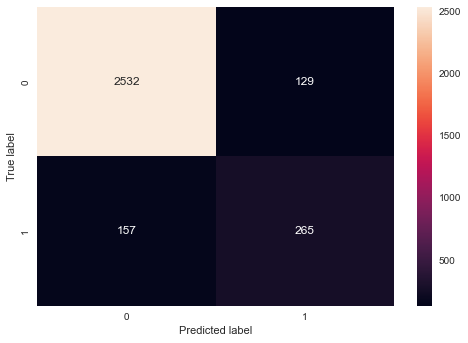

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# make predictions on the validation set
y_pred = rf1.predict(x_valid)

# calculate the confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [96]:
acc = accuracy_score(y_valid, rf1.predict(x_valid))
acc

0.9072332144015569

In [97]:
rf1.predict(x_valid)

array([0, 0, 1, ..., 1, 0, 0])

In [98]:
print("Training performance:")
rf1_ = model_performance_classification_statsmodels(rf1, x_valid, y_valid)
rf1_

Training performance:


,Accuracy,Recall,Precision,F1
0,0.907233,0.627962,0.672589,0.64951


<AxesSubplot:ylabel='cols'>

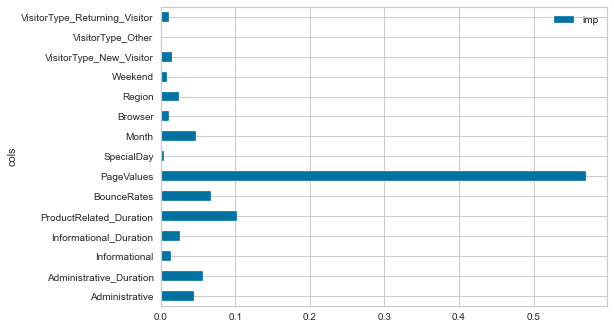

In [99]:
pd.DataFrame(dict(cols=x_train.columns, imp=rf1.feature_importances_)).plot('cols','imp','barh')

In [100]:
tem1 = pd.DataFrame(dict(cols=x_train.columns, imp=rf1.feature_importances_))
tem1

,cols,imp
0,Administrative,0.044571
1,Administrative_Duration,0.056439
2,Informational,0.014068
3,Informational_Duration,0.025388
4,ProductRelated_Duration,0.101688
5,BounceRates,0.066952
6,PageValues,0.570036
7,SpecialDay,0.004118
8,Month,0.046999
9,Browser,0.011321


In [101]:
#using data with dummy varaibles
df5 = df3.copy()
df5.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Weekend,VisitorType_New_Visitor,...,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,V_Revenue,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.508335,-0.457683,2.562803,-0.308821,1,1,...,0,0,0,0,0,0,0,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.082173,-0.163049,-0.317178,-0.308821,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.507228,-0.245054,1.178195,0.337689,-0.573853,-0.457683,-0.317178,-0.308821,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.281859,-0.457683,-0.317178,-0.308821,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.274133,-0.457683,-0.317178,-0.308821,0,0,...,0,1,0,0,0,0,0,0,0,0


In [102]:
X_2 = df5.drop(['V_Revenue', 'Revenue'], axis=1)

y_2 = df5['Revenue']

seed = 42

x_train2, x_valid2, y_train2, y_valid2 = train_test_split(X_2, y_2, test_size=0.25, random_state=seed)

In [103]:
rf2 = RandomForestClassifier(100, min_samples_leaf=5)
rf2.fit(x_train2, y_train2.values.ravel()) #avoid the warning message
acc = 1 - mean_absolute_error(y_valid2, rf2.predict(x_valid2))
acc

0.9075575737917613

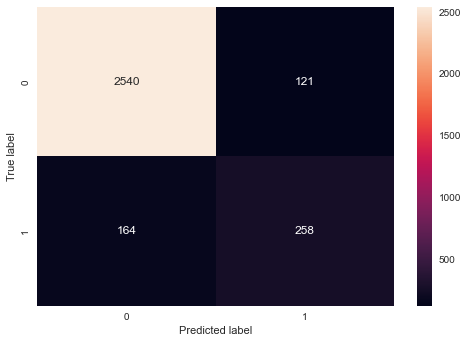

In [104]:
y_pred2 = rf2.predict(x_valid2)
cm = confusion_matrix(y_valid2, y_pred2)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [105]:
print("Training performance:")
rf2_ = model_performance_classification_statsmodels(
    rf2, x_valid2, y_valid2
)
rf2_

Training performance:


,Accuracy,Recall,Precision,F1
0,0.907558,0.611374,0.680739,0.644195


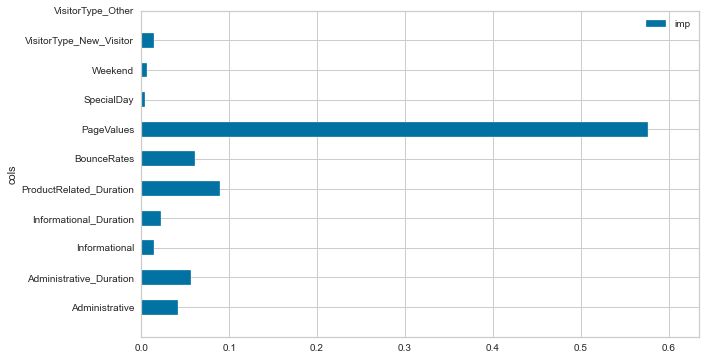

In [106]:
tem2 = pd.DataFrame(dict(cols=x_train2.columns, imp=rf2.feature_importances_))
ax = tem2.plot(kind='barh', x='cols', y='imp', figsize=(10, 6))

# set the x-axis and y-axis limits to zoom in on the top 10 features
ax.set_xlim(0, tem2['imp'].nlargest(10).max() * 1.1)
ax.set_ylim(-1, 10)

# show the plot
plt.show()

# Based on our feature importance, we can choose some of the features.

In [107]:
cols = ['PageValues','ProductRelated_Duration','BounceRates','Administrative_Duration','Administrative',
       'Informational_Duration','Informational','VisitorType_Other']
target = ['Revenue']

In [108]:
df4.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month', 'Browser', 'Region', 'Weekend',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'V_Revenue', 'Revenue'],
      dtype='object')

# SVM model1

In [109]:
df_svm1 = df4[cols]
y_svm = df4['Revenue']

In [110]:
seed = 42

x_train3, x_valid3, y_train3, y_valid3 = train_test_split(df_svm1, y_svm, test_size=0.25, random_state=seed)

In [111]:
# create an instance of an SVM classifier
clf_1 = svm.SVC(kernel="linear", C=1, gamma=0.1)

# fit the SVM classifier to the transformed training data + the response data
clf_1.fit(x_train3, y_train3)

# check the accuracy of the SVM classifier using the transformed explanatory variables + the response variable
print("score", clf_1.score(x_valid3, y_valid3))

score 0.8949075575737918


In [112]:
print("Training performance:")
svm1 = model_performance_classification_statsmodels(
    clf_1, x_valid3, y_valid3
)
svm1

Training performance:


,Accuracy,Recall,Precision,F1
0,0.894908,0.433649,0.682836,0.530435


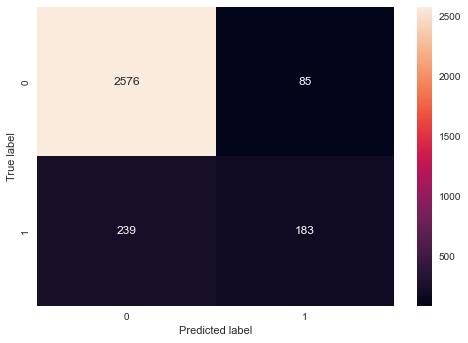

In [113]:
y_pred3 = clf_1.predict(x_valid3)
cm = confusion_matrix(y_valid3, y_pred3)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# SVM model2
### Change kernel to Poly

In [114]:
from sklearn.svm import SVC
from sklearn import svm
clf_2 = svm.SVC(kernel="poly", C=1, gamma=0.5)

# fit the SVM classifier to the transformed training data + the response data
clf_2.fit(x_train3, y_train3)

# check the accuracy of the SVM classifier using the transformed explanatory variables + the response variable
print("score", clf_2.score(x_valid3, y_valid3))

score 0.8994485890366526


In [115]:
print("Training performance:")
svm2 = model_performance_classification_statsmodels(
    clf_2, x_valid3, y_valid3
)
svm2

Training performance:


,Accuracy,Recall,Precision,F1
0,0.899449,0.407583,0.741379,0.525994


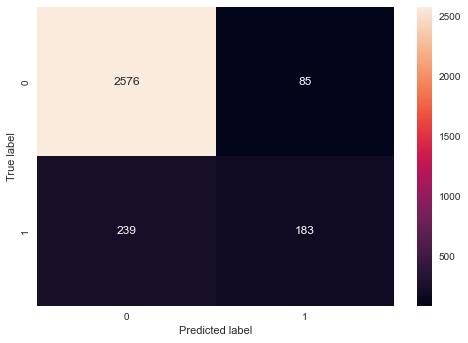

In [116]:
y_pred4 = clf_2.predict(x_valid3)
cm = confusion_matrix(y_valid3, y_pred3)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# For these two SVM model, we think model1 in better, although the accuracy in lower than model2, but it has a higher recall score and a higher F1-score.

# Conclution:

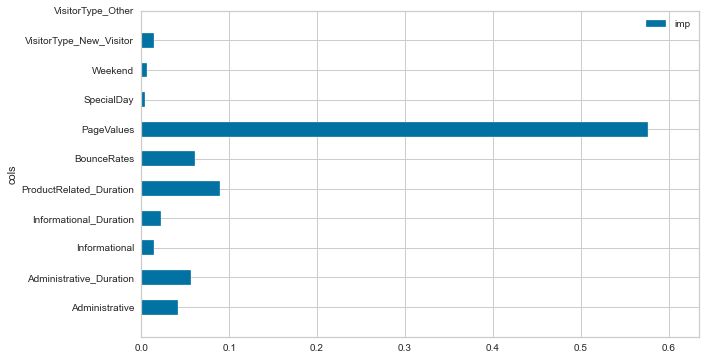

In [117]:
tem2 = pd.DataFrame(dict(cols=x_train2.columns, imp=rf2.feature_importances_))
ax = tem2.plot(kind='barh', x='cols', y='imp', figsize=(10, 6))

# set the x-axis and y-axis limits to zoom in on the top 10 features
ax.set_xlim(0, tem2['imp'].nlargest(10).max() * 1.1)
ax.set_ylim(-1, 10)

# show the plot
plt.show()

<AxesSubplot:>

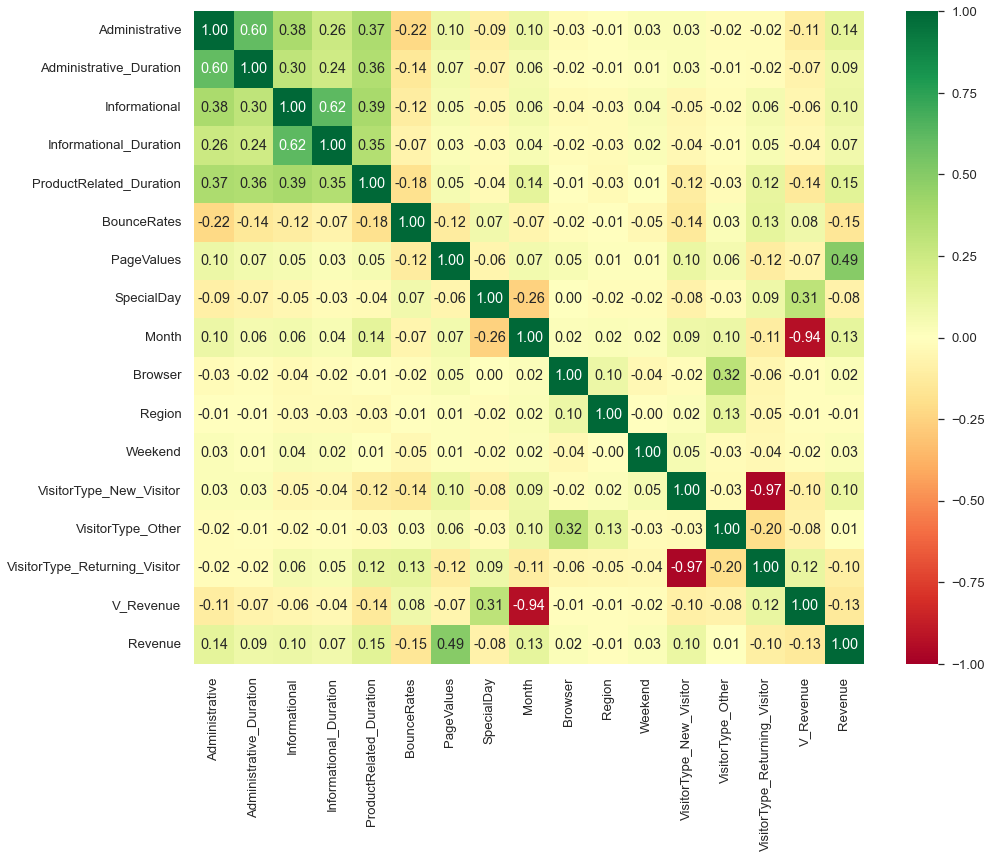

In [118]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1.2)
sns.heatmap(df2.corr(),cmap='RdYlGn',vmin = -1, vmax = 1,annot=True,fmt=".2f")

__Observation__:

The more pages visitor views the more likely they will buy the products

There is colinear relationship between people who spent on Product_Duration and their probablity of purchasing.

__Suggestion__: 

I suggested to add more product related page to attract more customer

__Baseline__:

84%

__Result__: Meet Baseline

__Model Compare__:

Accuracy of K-means: 45.0%

Accuracy of Get Dunmmies K-means: 78.2%

Accuracy of Randomforest: 90.7%

Accuracy of SVM model1: 89.5%

Accuracy of SVM model2: 89.9%

__Best Model__:

Accuracy of Randomforest: 90.7%

__Best Result__:

Randomforest